<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/Tensorflow/0204_Chap5_1_Chap5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_noise_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8648 - loss: 0.4712 - val_accuracy: 0.9572 - val_loss: 0.1500
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9630 - loss: 0.1320 - val_accuracy: 0.9684 - val_loss: 0.1076
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9758 - loss: 0.0822 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9831 - loss: 0.0590 - val_accuracy: 0.9734 - val_loss: 0.0870
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9880 - loss: 0.0424 - val_accuracy: 0.9796 - val_loss: 0.0738
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9907 - loss: 0.0335 - val_accuracy: 0.9768 - val_loss: 0.0788
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9927 - loss: 0.0254 - val_accuracy: 0.9779 - val_loss: 0.0812
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9949 - loss: 0.0189 - va

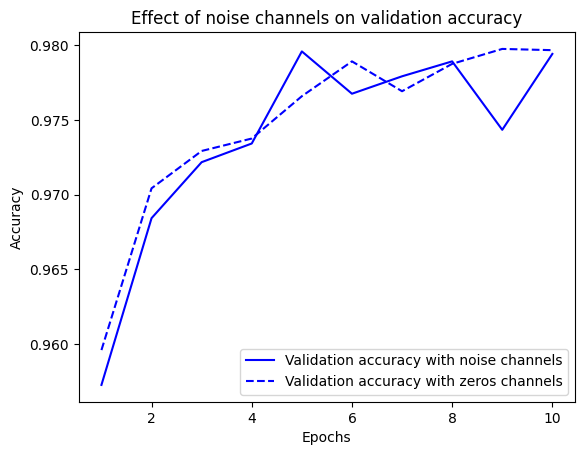

In [8]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

history_random = model.fit(train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0983 - loss: 2.3344 - val_accuracy: 0.1058 - val_loss: 2.3051
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1191 - loss: 2.2969 - val_accuracy: 0.1015 - val_loss: 2.3087
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1302 - loss: 2.2887 - val_accuracy: 0.1000 - val_loss: 2.3177
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1428 - loss: 2.2747 - val_accuracy: 0.1088 - val_loss: 2.3291
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1549 - loss: 2.2592 - val_accuracy: 0.1001 - val_loss: 2.3345
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1660 - loss: 2.2377 - val_accuracy: 0.1023 - val_loss: 2.3493
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.1873 - loss: 2.2137 - val_accuracy: 0.0993 - val_loss: 2.3655
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2026 - loss: 2.1835 -

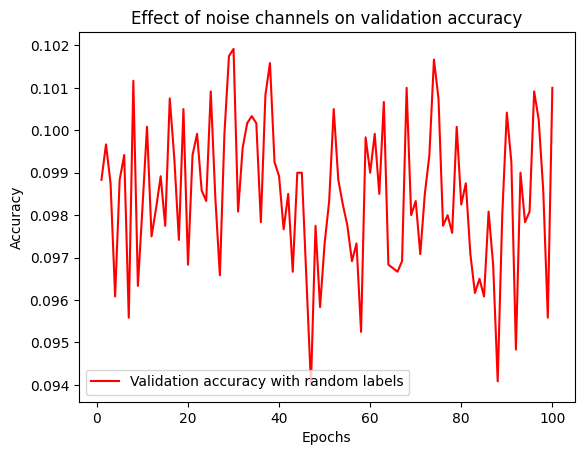

In [17]:
import matplotlib.pyplot as plt

val_acc_random = history_random.history['val_accuracy']

epochs = range(1, 101)
plt.plot(epochs, val_acc_random, 'r-', label='Validation accuracy with random labels')

plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST 데이터셋 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 데이터를 합쳐서 섞은 후, 검증 데이터와 훈련 데이터로 분리합니다.
data = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

num_validation_samples = 10000
np.random.shuffle(data)

# 검증 데이터와 훈련 데이터를 분리합니다.
validation_data = data[:num_validation_samples]
validation_labels = labels[:num_validation_samples]
training_data = data[num_validation_samples:]
training_labels = labels[num_validation_samples:]

# 모델 정의
def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

# 모델 훈련 및 검증
model = get_model()
model.fit(training_data, training_labels, epochs=10, batch_size=128) # 훈련 데이터로 모델 훈련
validation_score = model.evaluate(validation_data, validation_labels) # 검증 데이터로 모델 평가

# 전체 데이터로 모델 재훈련 및 테스트
model = get_model()
model.fit(data, labels, epochs=10, batch_size=128) # 전체 데이터로 모델 재훈련
test_score = model.evaluate(test_images, test_labels) # 테스트 데이터로 모델 평가

print("Validation Score:", validation_score)
print("Test Score:", test_score)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1008 - loss: 2.3272
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1137 - loss: 2.2992
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1262 - loss: 2.2923
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1371 - loss: 2.2811
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1479 - loss: 2.2664
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1565 - loss: 2.2486
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1748 - loss: 2.2261
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1904 - loss: 2.2043
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2046 - loss: 2.1744
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2250 - loss: 2.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1046 - loss: 2.4229
Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step 

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST 데이터셋 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 데이터를 합쳐서 섞은 후, 검증 데이터와 훈련 데이터로 분리합니다.
data = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

# K-폴드 검증 설정
k = 3
num_validation_samples = len(data) // k

# K-폴드 검증 수행
validation_scores = []
for fold in range(k):
  # 검증 데이터와 훈련 데이터 분할
  validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)]
  validation_labels = labels[num_validation_samples * fold: num_validation_samples * (fold + 1)]
  training_data = np.concatenate([data[:num_validation_samples * fold], data[num_validation_samples * (fold + 1):]])
  training_labels = np.concatenate([labels[:num_validation_samples * fold], labels[num_validation_samples * (fold + 1):]])

  # 모델 생성 및 훈련
  model = get_model()  # get_model() 함수는 이전 답변에서 정의된 함수를 사용합니다.
  model.fit(training_data, training_labels, epochs=10, batch_size=128)

  # 검증 데이터로 평가
  validation_score = model.evaluate(validation_data, validation_labels, verbose=0)
  validation_scores.append(validation_score[1])  # 정확도만 저장

# 평균 검증 점수 계산
validation_score = np.average(validation_scores)

# 전체 데이터로 모델 재훈련 및 테스트
model = get_model()
model.fit(data, labels, epochs=10, batch_size=128)
test_score = model.evaluate(test_images, test_labels, verbose=0)

print("Average Validation Accuracy:", validation_score)
print("Test Accuracy:", test_score[1])  # 테스트 정확도 출력

Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8611 - loss: 0.4764
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9613 - loss: 0.1317
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9765 - loss: 0.0843
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9839 - loss: 0.0569
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9877 - loss: 0.0400
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9909 - loss: 0.0312
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9940 - loss: 0.0225
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9960 - loss: 0.0165
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9971 - loss: 0.0127
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9984 - loss: 0.0083
Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8628 - loss: 0.4700
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s